Import libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
import urllib.request
import time
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns

Load files

In [3]:
crypto ="WAVES"

In [ ]:
def get_klines_iter(symbol, interval, start, end, limit=5000):
    df = pd.DataFrame()
    startDate = end
    while startDate>start:
        url = 'https://api.binance.com/api/v3/klines?symbol=' + \
            symbol + '&interval=' + interval + '&limit='  + str(iteration)
        if startDate is not None:
            url += '&endTime=' + str(startDate)
        
        df2 = pd.read_json(url)
        df2.columns = ['Opentime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Closetime', 'Quote asset volume', 'Number of trades','Taker by base', 'Taker buy quote', 'Ignore']
        df = pd.concat([df2, df], axis=0, ignore_index=True, keys=None)
        startDate = df.Opentime[0]   
    df.reset_index(drop=True, inplace=True)    
    return df 

In [ ]:
get_klines_iter('WAVESUSDT','1h',)

In [4]:
api_key = '5npiw6btuqo9hgg5sut30c'

ur = "https://api.lunarcrush.com/v2?data=assets&key=" + api_key + "&symbol=" + crypto + "&data_points=168&interval=hour"
ass = json.loads(urllib.request.urlopen(ur).read())

lab = pd.DataFrame(ass['data'])[['id', 'name','symbol']]
ts = pd.DataFrame(ass['data'][0]['timeSeries'])

In [5]:
data = pd.merge(lab, ts, how='right', left_on='id', right_on='asset_id')
data['time'] = pd.to_datetime(data['time'], unit='s')

In [6]:
data.columns

Index(['id', 'name', 'symbol', 'asset_id', 'time', 'open', 'close', 'high',
       'low', 'volume', 'market_cap', 'url_shares', 'unique_url_shares',
       'reddit_posts', 'reddit_posts_score', 'reddit_comments',
       'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers',
       'tweet_quotes', 'tweet_retweets', 'tweet_replies', 'tweet_favorites',
       'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3',
       'tweet_sentiment4', 'tweet_sentiment5', 'tweet_sentiment_impact1',
       'tweet_sentiment_impact2', 'tweet_sentiment_impact3',
       'tweet_sentiment_impact4', 'tweet_sentiment_impact5', 'social_score',
       'average_sentiment', 'sentiment_absolute', 'sentiment_relative',
       'search_average', 'news', 'price_score', 'social_impact_score',
       'correlation_rank', 'galaxy_score', 'volatility', 'alt_rank',
       'alt_rank_30d', 'market_cap_rank', 'percent_change_24h_rank',
       'volume_24h_rank', 'social_volume_24h_rank', 'social_score_24h_rank'

In [7]:
data.head(1)

,id,name,symbol,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance,percent_change_24h
0,48,Waves,WAVES,48,2021-05-30 16:00:00,12.724485,12.7471,12.846831,12.552837,8550313,1272435581,1.0,1.0,NaN,NaN,NaN,NaN,214,4,6307,0,0,0,0,1,25,23,152,13,29,594,328,4236,1120,6308,3.7,3,86,None,None,2.7,3.0,2.7,60.5,0.042437,285,92,72,1532,69,89,270,NaN,None,211,215,0.000356,54673,0.393247,1.629955e+12,0.078066,-1.241634


In [8]:
dat = data[['time', 'close']]

In [9]:
#series
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    169 non-null    datetime64[ns]
 1   close   169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


Check for null values

Chart

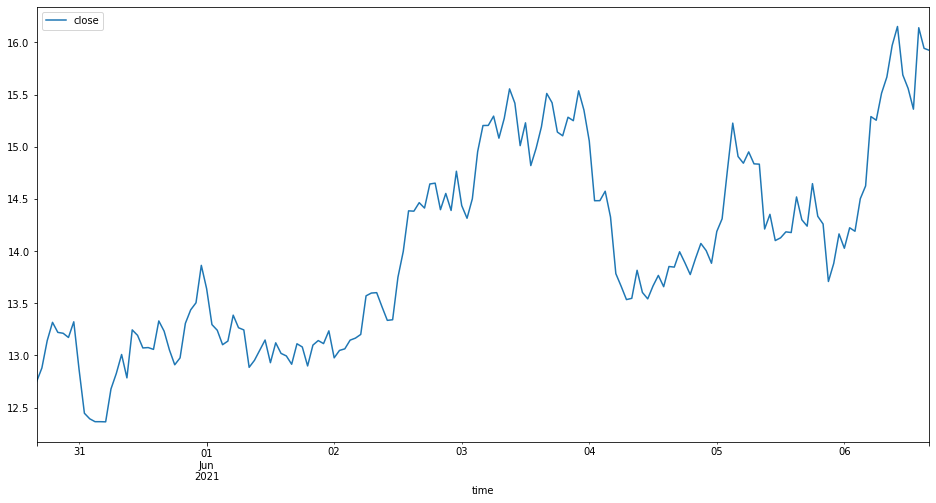

In [10]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 1, sharey=True)
dat.plot(kind='line', x='time', y='close', ax=axs, figsize=(16, 8))

Define training and validation dates

In [11]:
dat.time = dat.time.astype(str)
dat.index = dat.time
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2021-05-30 16:00:00 to 2021-06-06 16:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    169 non-null    object 
 1   close   169 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
# timespan
p=-5

In [13]:
train=dat.iloc[:p-1] 
valid=dat.iloc[p:]

In [14]:
train

,time,close
time,,
2021-05-30 16:00:00,2021-05-30 16:00:00,12.747100
2021-05-30 17:00:00,2021-05-30 17:00:00,12.879419
2021-05-30 18:00:00,2021-05-30 18:00:00,13.140851
2021-05-30 19:00:00,2021-05-30 19:00:00,13.316522
2021-05-30 20:00:00,2021-05-30 20:00:00,13.220093
...,...,...
2021-06-06 06:00:00,2021-06-06 06:00:00,15.253982
2021-06-06 07:00:00,2021-06-06 07:00:00,15.512602
2021-06-06 08:00:00,2021-06-06 08:00:00,15.667973


In [15]:
valid

,time,close
time,,
2021-06-06 12:00:00,2021-06-06 12:00:00,15.558846
2021-06-06 13:00:00,2021-06-06 13:00:00,15.359957
2021-06-06 14:00:00,2021-06-06 14:00:00,16.140506
2021-06-06 15:00:00,2021-06-06 15:00:00,15.943194
2021-06-06 16:00:00,2021-06-06 16:00:00,15.923599


Graphics

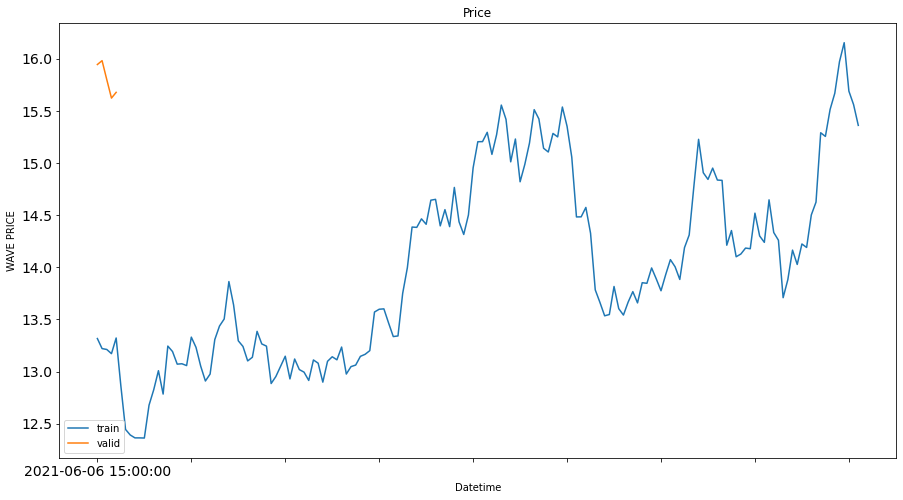

In [16]:
train['close'].plot(figsize=(15,8), title= 'Price', fontsize=14, label='train') 
valid['close'].plot(figsize=(15,8), title= 'Price', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("WAVE PRICE") 
plt.legend(loc='best') 
plt.show()

Rename columns

In [17]:
import datetime
from datetime import datetime

train = train.rename(columns={'time': 'ds','close': 'y'})
train

,ds,y
time,,
2021-05-30 19:00:00,2021-05-30 19:00:00,13.316522
2021-05-30 20:00:00,2021-05-30 20:00:00,13.220093
2021-05-30 21:00:00,2021-05-30 21:00:00,13.211734
2021-05-30 22:00:00,2021-05-30 22:00:00,13.171525
2021-05-30 23:00:00,2021-05-30 23:00:00,13.321626
...,...,...
2021-06-06 09:00:00,2021-06-06 09:00:00,15.971104
2021-06-06 10:00:00,2021-06-06 10:00:00,16.152499
2021-06-06 11:00:00,2021-06-06 11:00:00,15.688179


In [18]:

valid = valid.rename(columns={'time': 'ds','close': 'y'})
valid

,ds,y
time,,
2021-06-06 15:00:00,2021-06-06 15:00:00,15.943194
2021-06-06 16:00:00,2021-06-06 16:00:00,15.980290
2021-06-06 17:00:00,2021-06-06 17:00:00,15.799090
2021-06-06 18:00:00,2021-06-06 18:00:00,15.621506
2021-06-06 19:00:00,2021-06-06 19:00:00,15.676438


FB Prophet

In [19]:
#!pip install fbprophet

In [20]:
from fbprophet import Prophet

model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Make predictions

In [21]:
# Python
future = model.make_future_dataframe(periods=-p, freq='H')
future

,ds
0,2021-05-30 19:00:00
1,2021-05-30 20:00:00
2,2021-05-30 21:00:00
3,2021-05-30 22:00:00
4,2021-05-30 23:00:00
...,...
163,2021-06-06 14:00:00
164,2021-06-06 15:00:00
165,2021-06-06 16:00:00
166,2021-06-06 17:00:00


In [22]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(p)

,ds,yhat,yhat_lower,yhat_upper
5,2021-05-31 00:00:00,12.883411,12.367305,13.403819
6,2021-05-31 01:00:00,12.807020,12.312373,13.297984
7,2021-05-31 02:00:00,12.798890,12.304420,13.272893
8,2021-05-31 03:00:00,12.858583,12.353279,13.400324
9,2021-05-31 04:00:00,12.939363,12.444601,13.448404
...,...,...,...,...
163,2021-06-06 14:00:00,15.126675,14.625305,15.651254
164,2021-06-06 15:00:00,15.234876,14.750771,15.702274
165,2021-06-06 16:00:00,15.312817,14.790285,15.799527
166,2021-06-06 17:00:00,15.329876,14.803727,15.820671


In [23]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid.y, forecast.yhat.iloc[p:])
print(rms)

0.33543508342470435


In [24]:
df_val=pd.DataFrame({'actual': valid.y, 'predicted': forecast.yhat.iloc[p:].values})
df_val

,actual,predicted
time,,
2021-06-06 15:00:00,15.943194,15.126675
2021-06-06 16:00:00,15.980290,15.234876
2021-06-06 17:00:00,15.799090,15.312817
2021-06-06 18:00:00,15.621506,15.329876
2021-06-06 19:00:00,15.676438,15.311306


Plot forecast

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


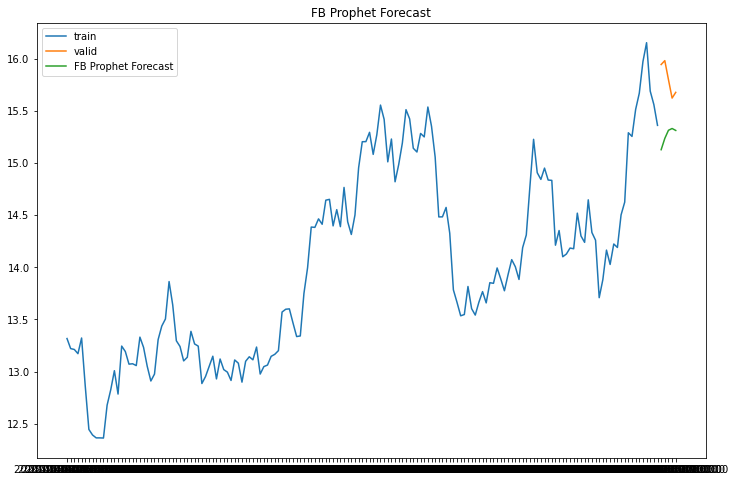

In [25]:
plt.figure(figsize=(12,8)) 
plt.plot(train.ds, train.y, label='train') 
plt.plot(valid.ds,valid.y, label='valid') 
plt.plot(forecast.yhat.iloc[p:], label='FB Prophet Forecast') 
plt.legend(loc='best') 
plt.title("FB Prophet Forecast") 
plt.show()